In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import seaborn as sns
import math
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from numpy import unique
from numpy import where
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/data/football_data.csv')
df_org = df.copy()

##Pre Processing

In [ ]:
def process_value(s):
  # print(s)
  if s[1] == '0':
    return np.nan
  if s == ' ' or s == '' or s == np.nan:
    return np.nan
  s = s[1:len(s)-1]
  return float(s)

In [ ]:
def process_wage(s):
  if s[1] == '0':
    return np.nan
  if s == ' ' or s == '' or s == np.nan:
    return np.nan
  s = s[1:len(s)-1]
  return float(s)

In [ ]:
def process_contract_valid(s):
  if s == ' ' or s == '' or s == np.nan or type(s) is float:
    return np.nan
  if len(s) > 4:
    s = s[-4:len(s)]
  return float(s)

In [ ]:
def process_height(s):
  if s == np.nan or s == ' ' or s == '' or type(s) is float:
    return np.nan
  s = s.split('\'')
  if len(s) == 1:
    return 12*int(s[0])
  else:
    a = 12*int(s[0])
    b = s[1]
    c = float(a)+float(b)
    return c

In [ ]:
def process_weight(s):
  if s == ' ' or s == '' or s == np.nan or type(s) is float:
    return np.nan
  s = s[0:len(s)-3]
  return float(s)

In [ ]:
def process_release_clause(s):
  if s == ' ' or s == '' or s == np.nan or type(s) is float:
    return np.nan
  s = s[1:len(s)-1]
  return float(s)

In [ ]:
def convertfloat(s):
  if s == ' ' or s == '' or s == np.nan or type(s) is float:
    return np.nan
  s = s.split('+')
  return float(int(s[0])+int(s[1]))

In [ ]:
def distance(x,c):
    sqrsum = 0
    for i in range(len(x)):
        sqrsum = sqrsum + ((x[i] - c[i]) ** 2)
    return sqrsum

In [ ]:
def calwss(centroid,cluster):
  wss = 0
  for i in range(len(centroid)):
    for j in range(len(cluster[i])):
      wss += distance(cluster[i][j],centroid[i])
  return math.sqrt(wss)

In [ ]:
df.drop(df.columns[24], axis=1, inplace=True)
df['Value'] = df['Value'].apply(process_value)
df['Wage'] = df['Wage'].apply(process_wage)
df['Height'] = df['Height'].apply(process_height)
df['Weight'] = df['Weight'].apply(process_weight)
df['Release Clause'] = df['Release Clause'].apply(process_release_clause)
df['Contract Valid Until'] = df['Contract Valid Until'].apply(process_contract_valid)
df['LS'] = df['LS'].apply(convertfloat)
df['ST'] = df['ST'].apply(convertfloat)
df['RS'] = df['RS'].apply(convertfloat)
df['LW'] = df['LW'].apply(convertfloat)
df['LF'] = df['LF'].apply(convertfloat)
df['CF'] = df['CF'].apply(convertfloat)
df['RF'] = df['RF'].apply(convertfloat)
df['RW'] = df['RW'].apply(convertfloat)
df['LAM'] = df['LAM'].apply(convertfloat)
df['CAM'] = df['CAM'].apply(convertfloat)
df['RAM'] = df['RAM'].apply(convertfloat)
df['LM'] = df['LM'].apply(convertfloat)
df['LCM'] = df['LCM'].apply(convertfloat)
df['CM'] = df['CM'].apply(convertfloat)
df['RCM'] = df['RCM'].apply(convertfloat)
df['RM'] = df['RM'].apply(convertfloat)
df['LWB'] = df['LWB'].apply(convertfloat)
df['LDM'] = df['LDM'].apply(convertfloat)
df['CDM'] = df['CDM'].apply(convertfloat)
df['RDM'] = df['RDM'].apply(convertfloat)
df['RWB'] = df['RWB'].apply(convertfloat)
df['LB'] = df['LB'].apply(convertfloat)
df['LCB'] = df['LCB'].apply(convertfloat)
df['CB'] = df['CB'].apply(convertfloat)
df['RCB'] = df['RCB'].apply(convertfloat)
df['RB'] = df['RB'].apply(convertfloat)

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df1 = numeric_df.drop(numeric_df.columns[[0, 1]], axis=1)
cols = list(numeric_df1.columns)

for i in cols :
  numeric_df1[i] = numeric_df1[i].apply(lambda x: float(x))
  numeric_df1.fillna(value=numeric_df1[i].mean(),inplace= True)

In [ ]:
ss = MinMaxScaler()
data_scaled = ss.fit_transform(numeric_df1)

In [ ]:
X = np.array(data_scaled)

In [ ]:
wss = []
sil_score = []

##Bottom up Approach

In [ ]:
c = [3,5,7,9,11]
s = []

##Number of clusters : 3

In [ ]:
X = data_scaled.copy()
agglo_model = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
agglo_model.fit(X)
cluster_labels = agglo_model.labels_
agglo_clusters = agglo_model.fit_predict(X)
s.append(silhouette_score(X,agglo_clusters))

##Number of clusters : 5

In [ ]:
X = data_scaled.copy()
agglo_model = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
agglo_model.fit(X)
cluster_labels = agglo_model.labels_
agglo_clusters = agglo_model.fit_predict(X)
s.append(silhouette_score(X,agglo_clusters))

##Number of clusters : 7

In [ ]:
X = data_scaled.copy()
agglo_model = AgglomerativeClustering(n_clusters=7,affinity='euclidean', linkage='ward')
agglo_model.fit(X)
cluster_labels = agglo_model.labels_
agglo_clusters = agglo_model.fit_predict(X)
s.append(silhouette_score(X,agglo_clusters))

##Number of clusters : 9

In [ ]:
X = data_scaled.copy()
agglo_model = AgglomerativeClustering(n_clusters=9,affinity='euclidean', linkage='ward')
agglo_model.fit(X)
cluster_labels = agglo_model.labels_
agglo_clusters = agglo_model.fit_predict(X)
s.append(silhouette_score(X,agglo_clusters))

##Number of clusters : 11

In [ ]:
X = data_scaled.copy()
agglo_model = AgglomerativeClustering(n_clusters=11,affinity='euclidean', linkage='ward')
agglo_model.fit(X)
cluster_labels = agglo_model.labels_
agglo_clusters = agglo_model.fit_predict(X)
s.append(silhouette_score(X,agglo_clusters))

**Graph of Number of clusters vs Silhouette Score**

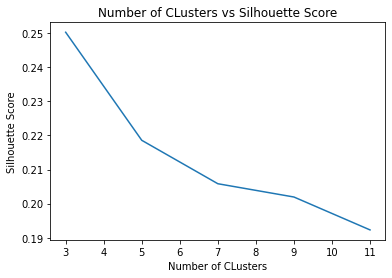

In [ ]:
plt.plot(c, s) 
plt.title('Number of CLusters vs Silhouette Score') 
plt.xlabel('Number of CLusters')
plt.ylabel('Silhouette Score')
plt.show()

**Dendogram Agglomerative Clustering**

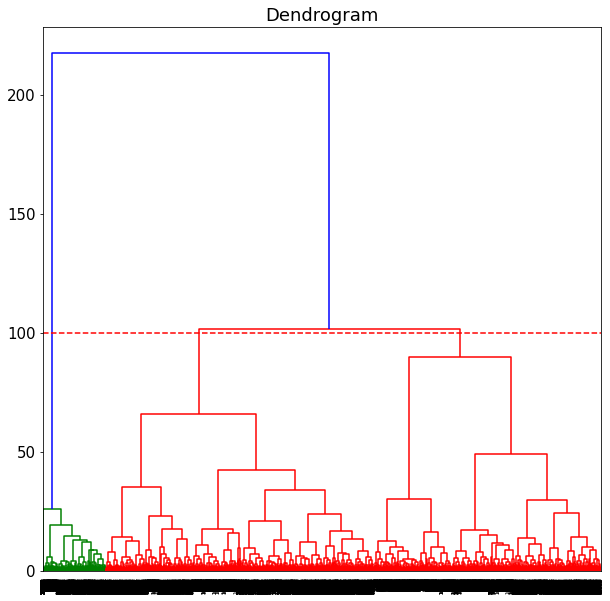

In [ ]:
plt.figure(figsize=(10, 10))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=100, color='r', linestyle='--')

##Best Bottom Up cluster with the Number of Clusters = 3

In [ ]:
X = data_scaled.copy()
agglo_model = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
agglo_model.fit(X)
cluster_labels = agglo_model.labels_
agglo_clusters = agglo_model.fit_predict(X)
print(f'Number of leaves in our tree: {agglo_model.n_leaves_}')
print(f'Clusters Assignments: {agglo_clusters}')

Number of leaves in our tree: 18207
Clusters Assignments: [0 0 0 ... 0 0 2]


##Finding Correlation Matrix and the most Correlated Attributes.

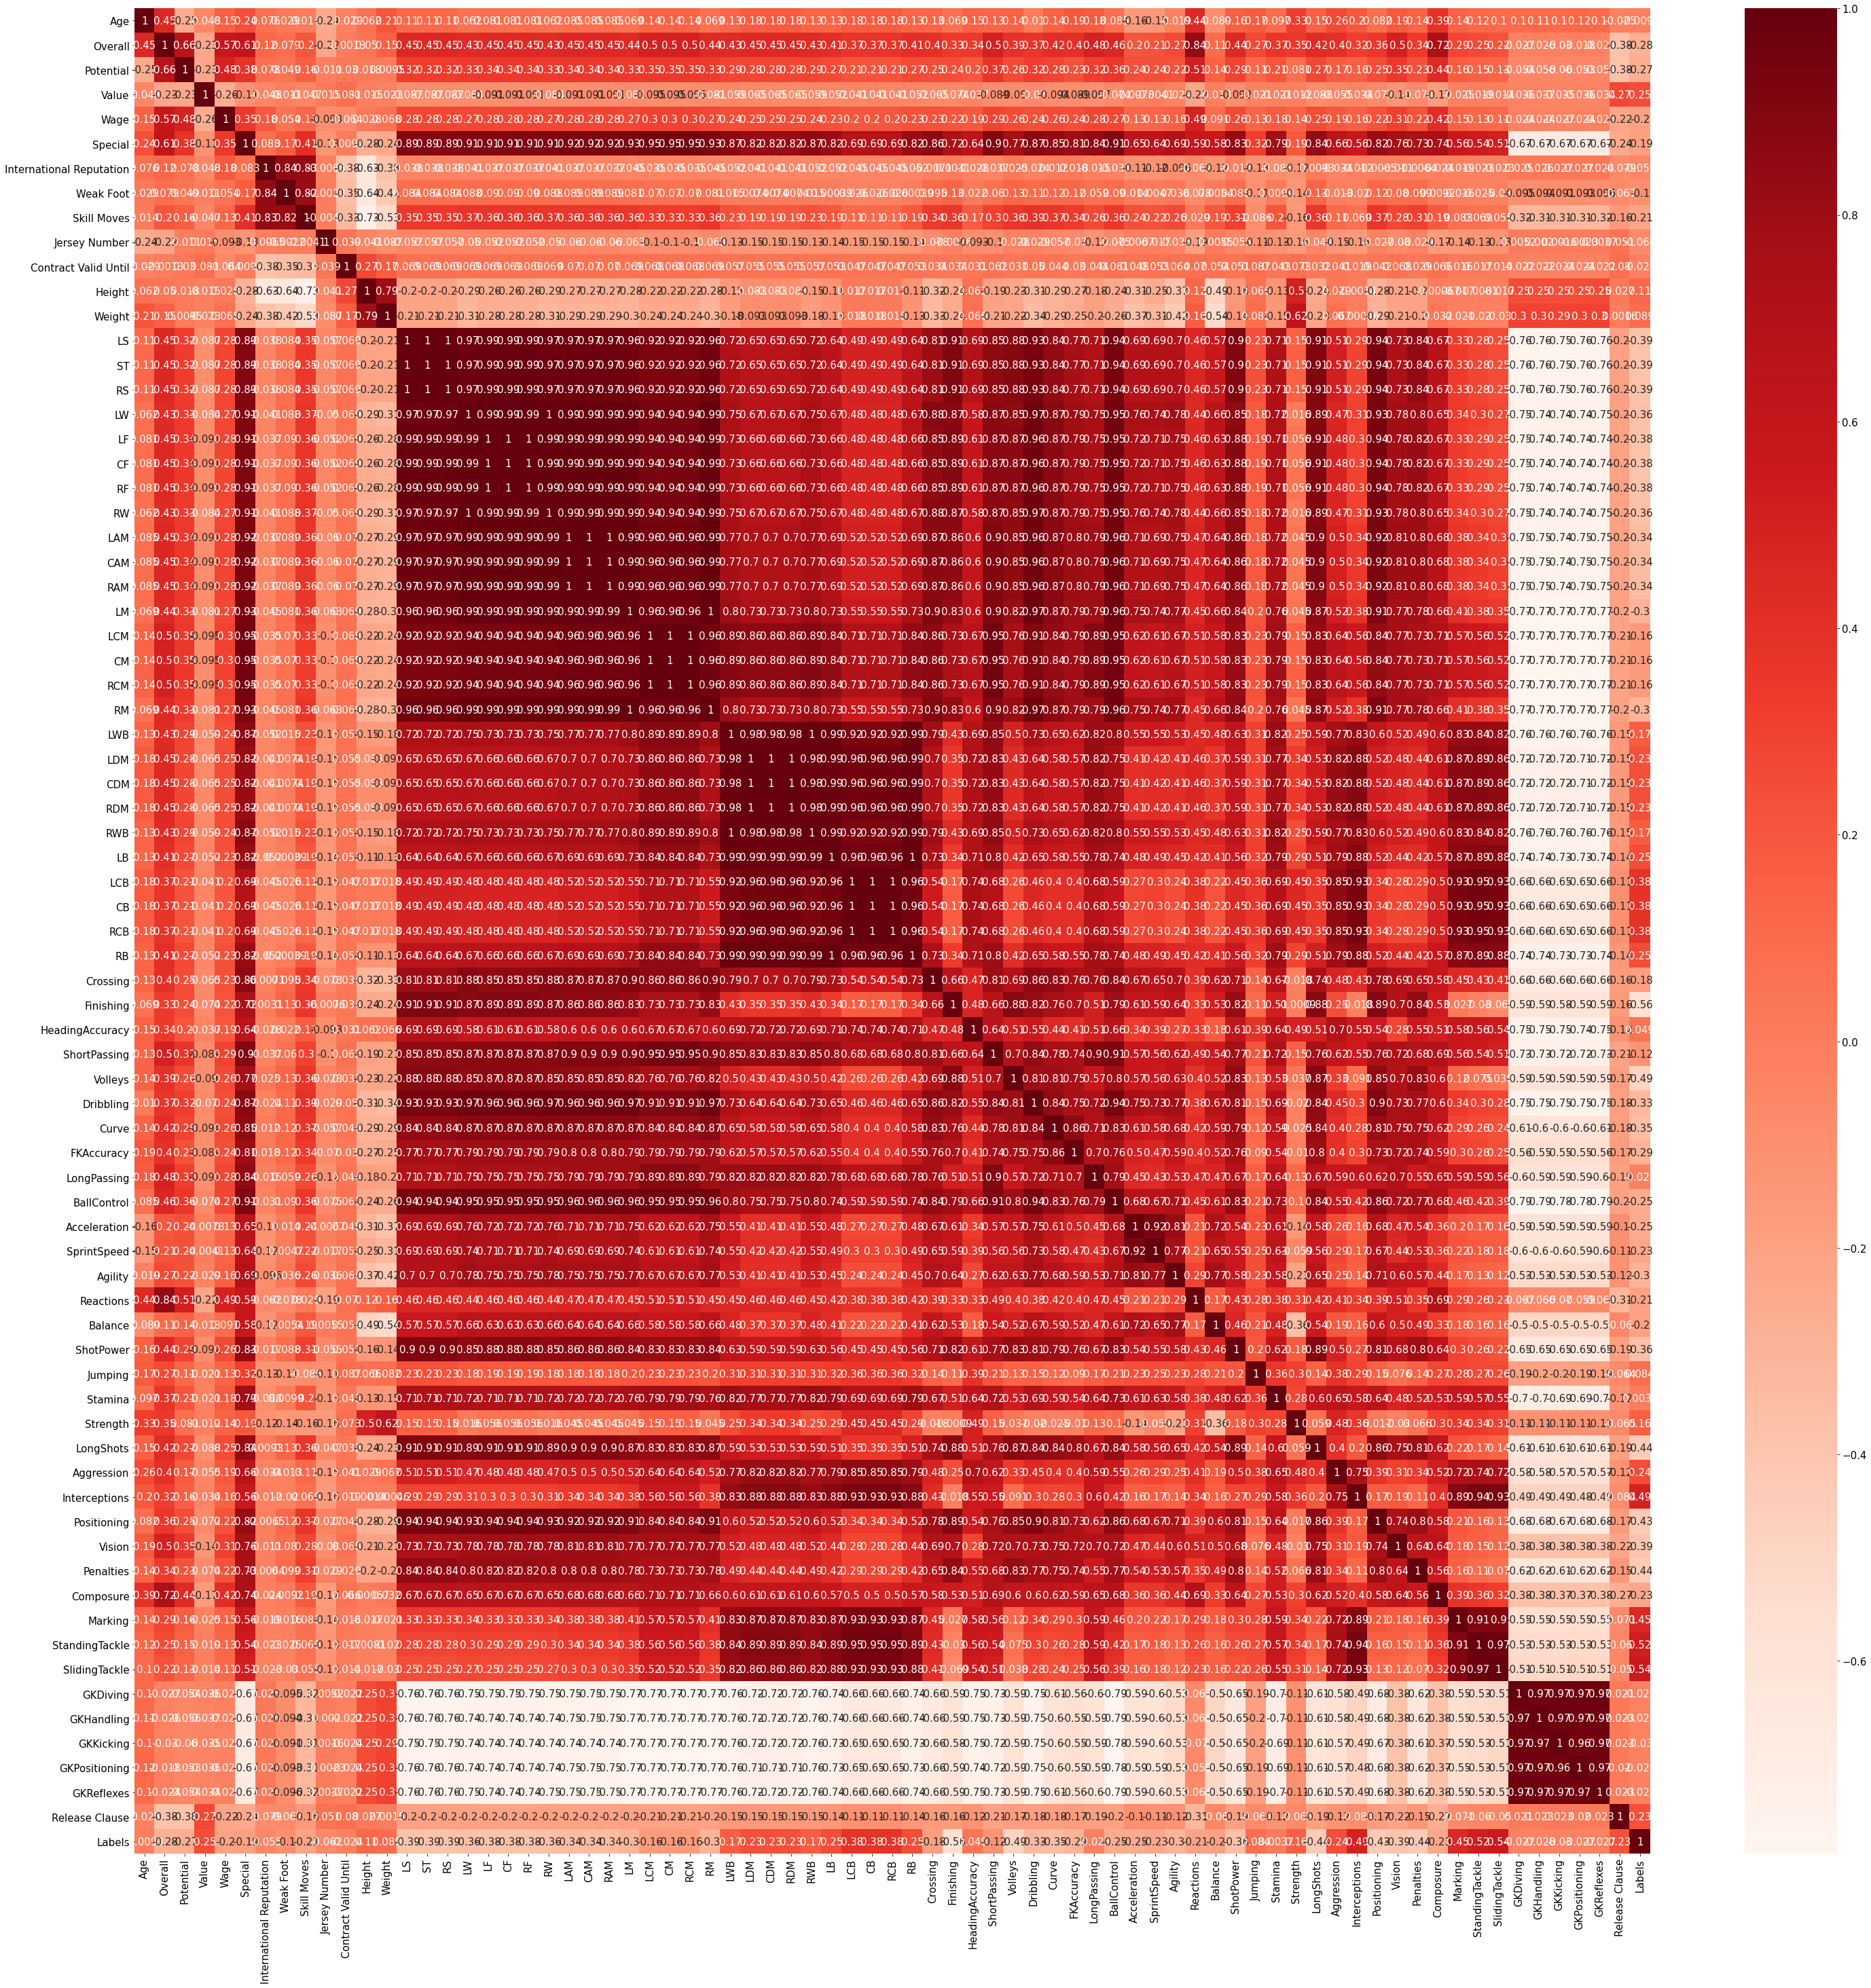

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(50,50),)
tdf = numeric_df1.copy()
tdf['Labels'] = agglo_clusters
cor = tdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["Labels"])
relevant_features = cor_target[cor_target>0.4]
relevant_features

Finishing         0.564768
Volleys           0.491181
LongShots         0.439600
Interceptions     0.486244
Positioning       0.427222
Penalties         0.435975
Marking           0.454719
StandingTackle    0.519392
SlidingTackle     0.539956
Labels            1.000000
Name: Labels, dtype: float64

##Distortion and Silhouette Score

In [ ]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X, agglo_clusters)
centroids = clf.centroids_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
cluster = list()
wss = list()
sil_score = list()
np_c1 = []
np_c2 = []
np_c3 = []
  
for i in range(agglo_clusters.shape[0]):
  if(agglo_clusters[i] == 0):
    np_c1.append(X[i])
for i in range(agglo_clusters.shape[0]):
  if(agglo_clusters[i] == 1):
    np_c2.append(X[i])
for i in range(agglo_clusters.shape[0]):
  if(agglo_clusters[i] == 2):
    np_c3.append(X[i])

np_c11 = np.array(np_c1)
np_c21 = np.array(np_c2)
np_c31 = np.array(np_c3)

cluster.append(np_c11)
cluster.append(np_c21)
cluster.append(np_c31)
  

wss.append(calwss(centroids, cluster))
sil_score.append(silhouette_score(X, cluster_labels))

In [ ]:
# calwss(centroids, cluster)
print(wss[0])
print(silhouette_score(X, agglo_clusters))

148.51193620973658
0.2502321210282322


##Cluster Name

In [ ]:
dic = {}
for i in range(len(cluster)):
  means = []
  for j in range(13,39):
    means.append(cluster[i][:,j].mean())
  if means.index(max(means))+15 not in dic:
    dic[means.index(max(means))+15] = max(means)
  else:
    s_means = set(means)
    s_means.remove(max(s_means))
    means = list(s_means)
    dic[means.index(max(means))+15] = max(means)
columns = numeric_df1.columns
for i in dic:
  print(columns[i])

CM
RS
CB


##Number of Points in CLusters

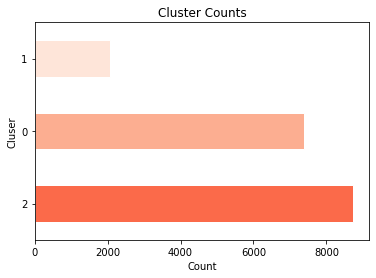

In [ ]:
target_counts = pd.Series(agglo_clusters).value_counts()
target_counts.plot.barh(color=['#fb6a4a', '#fcae91', '#fee5d9'], 
                        edgecolor='white');
plt.title('Cluster Counts')
plt.xlabel('Count')
plt.ylabel('Cluser');

In [ ]:
for i in range(len(target_counts)) :
  print("\nCluster", i+1, " : " , target_counts[i])


Cluster 1  :  7393

Cluster 2  :  2074

Cluster 3  :  8740


##Cluster Visualization

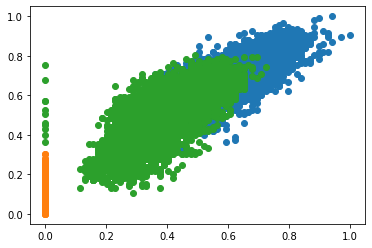

In [ ]:
clust = unique(agglo_clusters)
for cls in clust:
	row_ix = where(agglo_clusters == cls)
	plt.scatter(X[row_ix, 14], X[row_ix, 44])

##Top Down Approach

In [ ]:
sil_score_td = []

**Body of The Top Down Approach**

In [ ]:
def top_down(cluster, num_of_cluster,cls_index):
  if len(all_clusters) == num_of_cluster:
    return
  km = KMeans(n_clusters=2,random_state=42)
  km.fit(cluster)
  centroids = km.cluster_centers_
  all_centroids.append(centroids[0])
  all_centroids.append(centroids[1])
  labels = km.labels_
  cluster_1 = []
  cluster_2 = []
  indices_1 = [] 
  indices_2 = []
  lab = all_indices.pop(cls_index)
  for i in range(len(labels)):
    if labels[i] == 0:
      cluster_1.append(cluster[i])
      indices_1.append(lab[i])
    else:
      cluster_2.append(cluster[i])
      indices_2.append(lab[i])
  all_clusters.append(cluster_1)
  all_clusters.append(cluster_2)
  all_indices.append(indices_1)
  all_indices.append(indices_2)
  if len(all_clusters) == num_of_cluster:
    return
  intra_dist = []
  for i in range(len(all_clusters)):
    dist_intra = 0
    for j in all_clusters[i]:
      dist_intra += distance(all_centroids[i],j)
    intra_dist.append(dist_intra/len(all_clusters[i]))
  index = intra_dist.index(max(intra_dist))
  cluster = all_clusters.pop(index)
  all_centroids.pop(index)
  if len(all_clusters) == num_of_cluster:
    return
  top_down(cluster,num_of_cluster,index)

##Number of Cluster = 3

In [ ]:
X = data_scaled.copy()
all_clusters = []
all_centroids = []
temp = []
for i in range(X.shape[0]):
  temp.append(i)
all_indices = []
all_indices.append(temp)
cls_index = 0
top_down(X,3,cls_index)
label = [None]*X.shape[0]
l = 0
for indices in all_indices:
  for i in indices:
    label[i] = l
  l = l+1
sil_score_td.append(silhouette_score(X,label))

##Number of Cluster = 5

In [ ]:
X = data_scaled.copy()
all_clusters = []
all_centroids = []
temp = []
for i in range(X.shape[0]):
  temp.append(i)
all_indices = []
all_indices.append(temp)
cls_index = 0
top_down(X,5,cls_index)
label = [None]*X.shape[0]
l = 0
for indices in all_indices:
  for i in indices:
    label[i] = l
  l = l+1
sil_score_td.append(silhouette_score(X,label))

##Number of Cluster = 7

In [ ]:
X = data_scaled.copy()
all_clusters = []
all_centroids = []
temp = []
for i in range(X.shape[0]):
  temp.append(i)
all_indices = []
all_indices.append(temp)
cls_index = 0
top_down(X,7,cls_index)
label = [None]*X.shape[0]
l = 0
for indices in all_indices:
  for i in indices:
    label[i] = l
  l = l+1
sil_score_td.append(silhouette_score(X,label))

##Number of Cluster = 9

In [ ]:
X = data_scaled.copy()
all_clusters = []
all_centroids = []
temp = []
for i in range(X.shape[0]):
  temp.append(i)
all_indices = []
all_indices.append(temp)
cls_index = 0
top_down(X,9,cls_index)
label = [None]*X.shape[0]
l = 0
for indices in all_indices:
  for i in indices:
    label[i] = l
  l = l+1
sil_score_td.append(silhouette_score(X,label))

##Number of CLuster = 11

In [ ]:
X = data_scaled.copy()
all_clusters = []
all_centroids = []
temp = []
for i in range(X.shape[0]):
  temp.append(i)
all_indices = []
all_indices.append(temp)
cls_index = 0
top_down(X,11,cls_index)
label = [None]*X.shape[0]
l = 0
for indices in all_indices:
  for i in indices:
    label[i] = l
  l = l+1
sil_score_td.append(silhouette_score(X,label))

##Graph of Number of CLusters vs Silhouette Score.

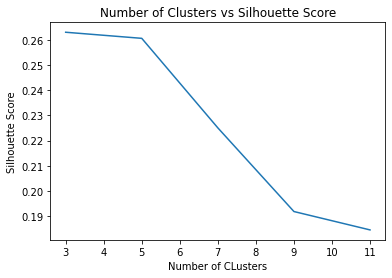

In [ ]:
c = [3,5,7,9,11]
plt.plot(c, sil_score_td) 
plt.title('Number of Clusters vs Silhouette Score') 
plt.xlabel('Number of CLusters')
plt.ylabel('Silhouette Score')
plt.show()

##Best Top Down Model with Cluster Number = 3

In [ ]:
X = data_scaled.copy()
all_clusters = []
all_centroids = []
temp = []
for i in range(X.shape[0]):
  temp.append(i)
all_indices = []
all_indices.append(temp)
cls_index = 0
top_down(X,3,cls_index)
label = [None]*X.shape[0]
l = 0
for indices in all_indices:
  for i in indices:
    label[i] = l
  l = l+1

In [ ]:
wss.append(calwss(all_centroids,all_clusters))
sil_score.append(silhouette_score(X,label))

##Intra Class Distortion and Silhouette Score.

In [ ]:
print(wss[1])
print(sil_score[1])

144.59723205507896
0.26305294569383864


**Dendrogram of Divisive Clustering**

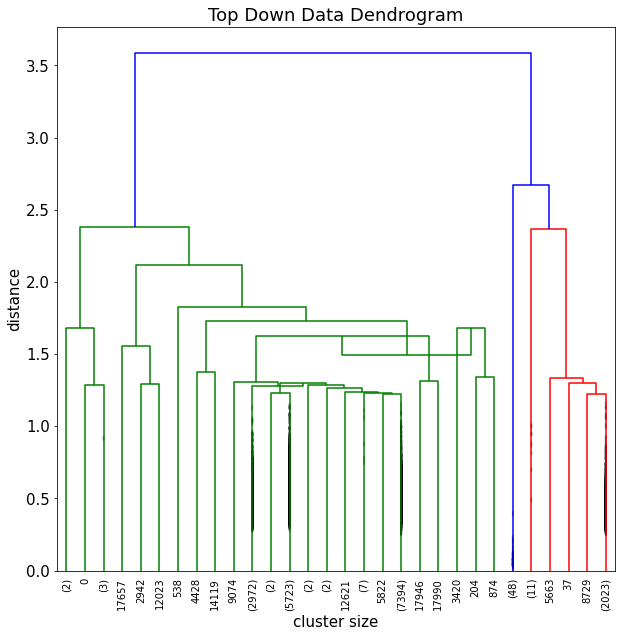

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
X = data_scaled.copy()
distances = linkage(X, method="centroid", metric="euclidean")
def annotated_dendrogram(*args, **kwargs):
    scipy_dendro = dendrogram(*args, truncate_mode='lastp', show_contracted=True,leaf_rotation=90.)

    plt.title('Top Down Data Dendrogram')
    plt.xlabel('cluster size')
    plt.ylabel('distance')
    
    for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 10:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    return scipy_dendro
plt.figure(figsize=(10,10))
dn = annotated_dendrogram(distances)
plt.show()

**Correlation Matring and the most correlated attributes in the cluster.**

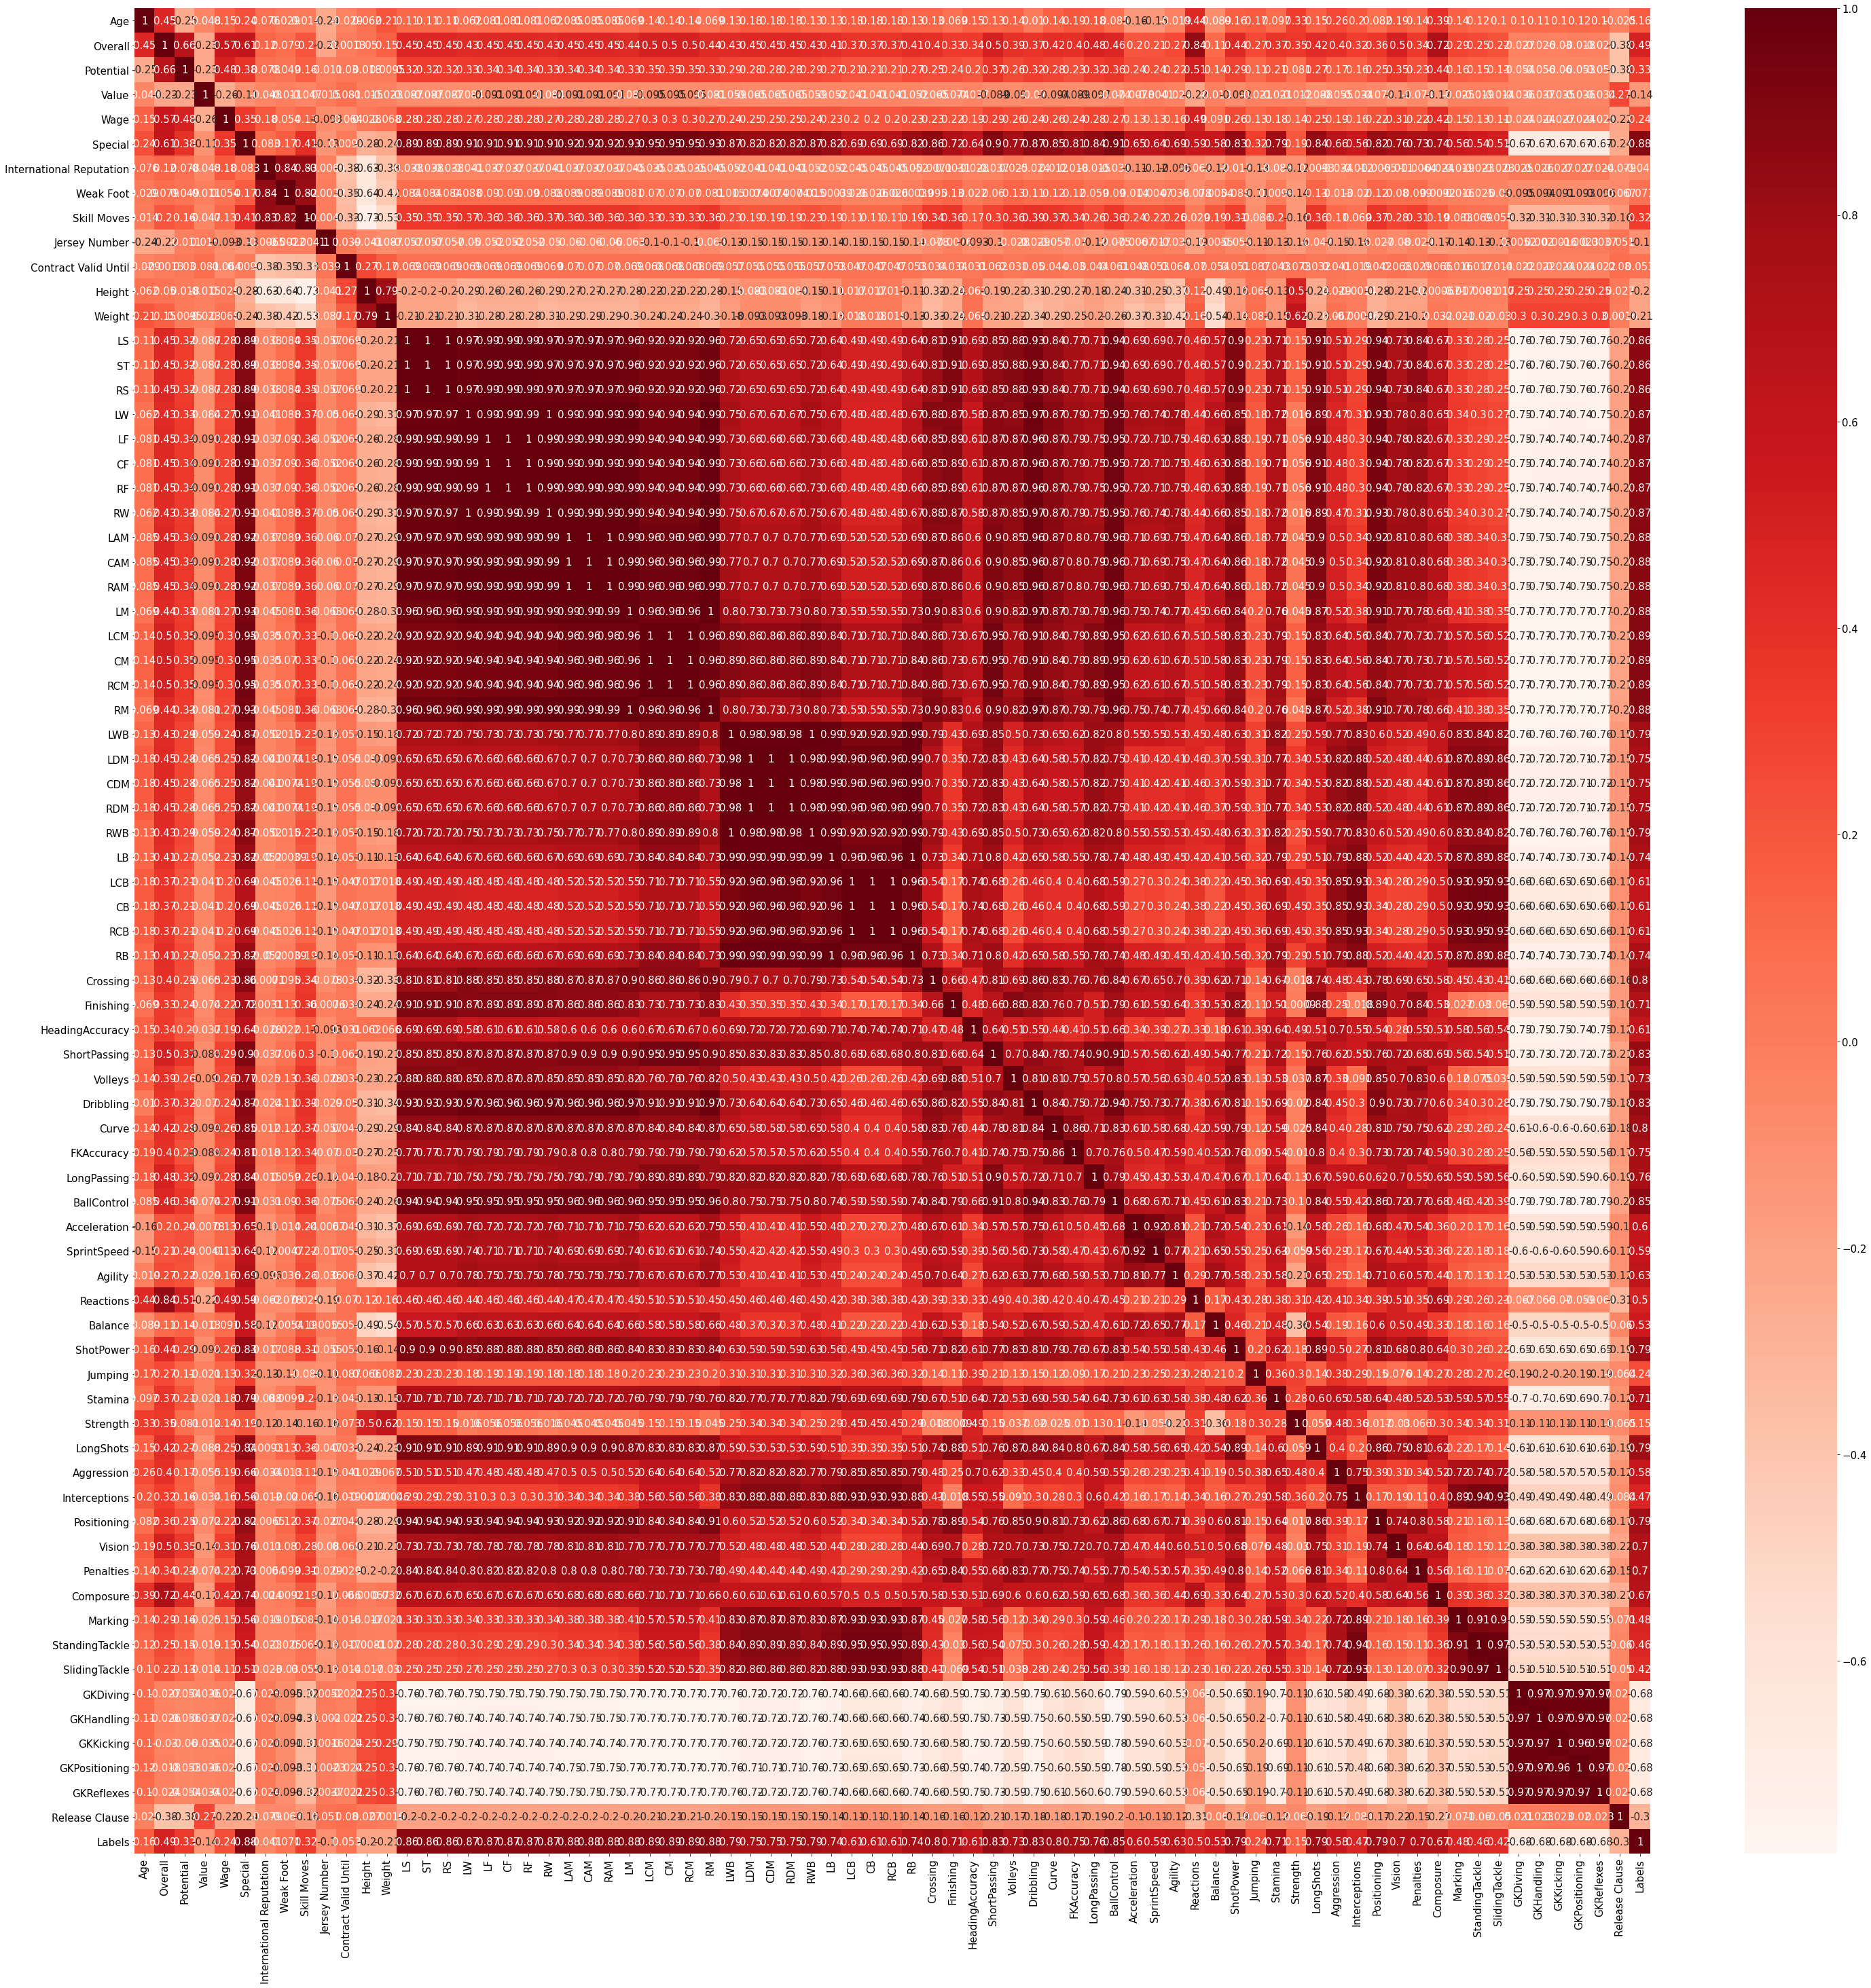

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(50,50),)
tdf = numeric_df1.copy()
tdf['Labels'] = label
cor = tdf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["Labels"])
relevant_features = cor_target[cor_target>0.8]
relevant_features

Special         0.883045
LS              0.860548
ST              0.860548
RS              0.860548
LW              0.868955
LF              0.870955
CF              0.870955
RF              0.870955
RW              0.868955
LAM             0.880156
CAM             0.880156
RAM             0.880156
LM              0.881441
LCM             0.894465
CM              0.894465
RCM             0.894465
RM              0.881441
ShortPassing    0.831851
Dribbling       0.827068
BallControl     0.854948
Labels          1.000000
Name: Labels, dtype: float64

**Cluster Names**

In [ ]:
dic = {}
cluster = []
for i in range(len(all_clusters)):
  cluster.append(np.array(all_clusters[i]))
for i in range(len(cluster)):
  means = []
  for j in range(13,39):
    means.append(cluster[i][:,j].mean())
  if means.index(max(means))+15 not in dic:
    dic[means.index(max(means))+15] = max(means)
  else:
    s_means = set(means)
    s_means.remove(max(s_means))
    means = list(s_means)
    dic[means.index(max(means))+15] = max(means)
columns = numeric_df1.columns
for i in dic:
  print(columns[i])

RCB
CB
CM


**Number of Points in a Cluster**

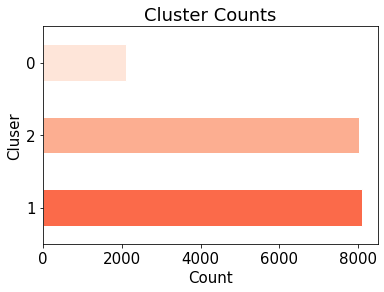

In [ ]:
target_counts = pd.Series(label).value_counts()
target_counts.plot.barh(color=['#fb6a4a', '#fcae91', '#fee5d9'], 
                        edgecolor='white');
plt.title('Cluster Counts')
plt.xlabel('Count')
plt.ylabel('Cluser');

In [ ]:
print("\nCluster", 0, " : " , target_counts[0])
print("\nCluster", 1, " : " , target_counts[1])
print("\nCluster", 2, " : " , target_counts[2])


Cluster 0  :  2109

Cluster 1  :  8088

Cluster 2  :  8010


**Cluster Visualization**

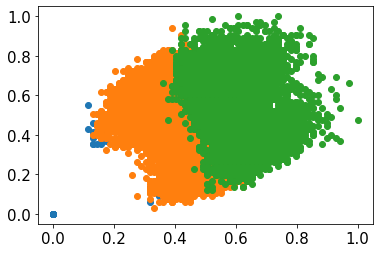

In [ ]:
clust = unique(label)
for cls in clust:
	row_ix = where(label == cls)
	plt.scatter(X[row_ix, 14], X[row_ix, 37])

**Comparison between Divisive CLustering and Agglomerative Clustering**

Text(0.5, 1.0, 'Distortion Comparison Between Bottom up and Top Down Approach')

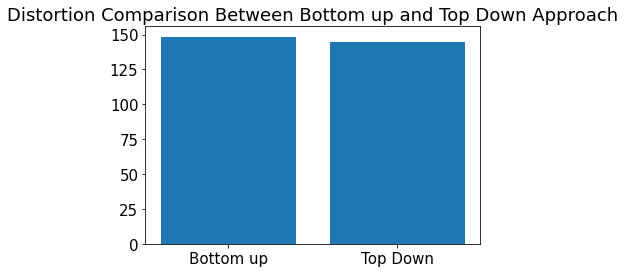

In [ ]:
D = {'Bottom up':wss[0],'Top Down':wss[1]}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title('Distortion Comparison Between Bottom up and Top Down Approach')

Text(0.5, 1.0, 'Silhouette Score Comparison Between Bottom up and Top Down Approach')

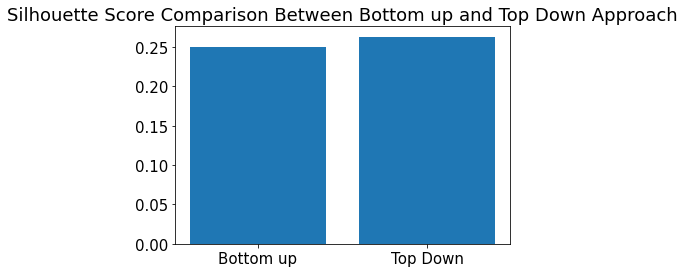

In [ ]:
D = {'Bottom up':sil_score[0],'Top Down':sil_score[1]}
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.title('Silhouette Score Comparison Between Bottom up and Top Down Approach')